In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('train_quora.csv')

In [5]:
df.shape

(404290, 6)

In [7]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [9]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['is_duplicate'].value_counts()

#This is checking for duplicated rows

0    255027
1    149263
Name: is_duplicate, dtype: int64

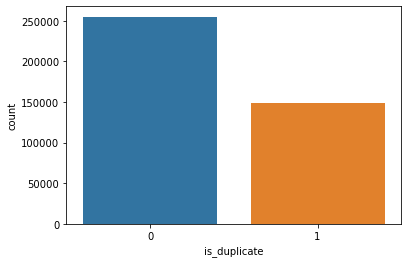

In [16]:
sns.countplot(df['is_duplicate'])
plt.show()

In [24]:
#repeated questions
qid=pd.Series(df['qid1'].tolist()+df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


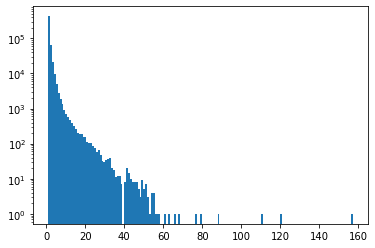

In [34]:
#repeated questions histogram
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

#qid.value_counts() tells how many times each question have appered.

In [42]:
new_df=df.sample(30000)

In [43]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [44]:
new_df.duplicated().sum()

#This is checking for duplicated rows

0

In [45]:
ques_df=new_df[['question1','question2']]

In [46]:
ques_df

,question1,question2
106255,Why is Google blocked in China?,Why is Facebook blocked in China?
339034,What is species?,What is a species in ecology?
372834,Who is a good ENT in the SF Bay Area?,Are there any good ear-nose-throat doctors ava...
303687,Why did human beings's brain evolve way too sm...,Why did apes evolve into humans? Why couldn't ...
193143,Why is sugar bad for us?,Why sugar is bad for health?
...,...,...
343359,How many people can I feed from 1000 rupees?,Who would you trade Dirk Nowitzki to before th...
307968,What is binary number system?,Why do digital circuits have to be binary?
367855,If you could create your own US political part...,What are some political and/or economic ideas ...
51878,Should I reconsider going to US for MS since T...,Should I consider NOT pursuing masters (MS) in...


In [51]:
from sklearn.feature_extraction.text import CountVectorizer
#merge texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000) #3000 words in the vocabulary
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [61]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [62]:
temp_df1.shape

(30000, 3000)

In [70]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
106255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343359,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
307968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367855,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [72]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
106255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
339034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303687,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343359,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
307968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.3,random_state=42)

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7388888888888889

0    18998
1    11002
Name: is_duplicate, dtype: int64
0    63.326667
1    36.673333
Name: is_duplicate, dtype: float64


<AxesSubplot:>

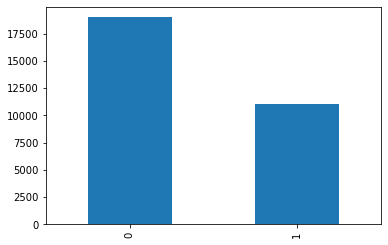

In [86]:
#distribution of duplicate and non-duplicate
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [90]:
#Repeated questions

qid=pd.Series(new_df['qid1'].tolist()+new_df['qid2'].tolist())
print('Number of unique qestions',np.unique(qid).shape[0])
x=qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique qestions 55382
Number of questions getting repeated 3441


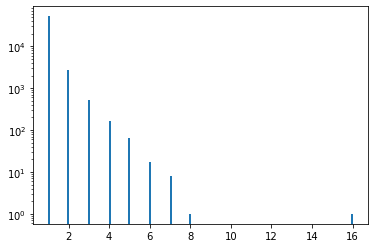

In [98]:
#Repeated questions histograms

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [107]:
#Feature engineering
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

new_df['q1_num_words']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2'].apply(lambda row:len(row.split(" ")))

In [108]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
106255,106255,175071,132954,Why is Google blocked in China?,Why is Facebook blocked in China?,0,31,33,6,6
339034,339034,222211,466625,What is species?,What is a species in ecology?,0,16,29,3,6
372834,372834,503587,503588,Who is a good ENT in the SF Bay Area?,Are there any good ear-nose-throat doctors ava...,0,37,124,10,21
303687,303687,426858,134631,Why did human beings's brain evolve way too sm...,Why did apes evolve into humans? Why couldn't ...,0,128,107,22,16
193143,193143,292983,148365,Why is sugar bad for us?,Why sugar is bad for health?,1,24,28,6,6


In [127]:
def common_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return len(w1 & w2)

In [132]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [134]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
106255,106255,175071,132954,Why is Google blocked in China?,Why is Facebook blocked in China?,0,31,33,6,6,5
339034,339034,222211,466625,What is species?,What is a species in ecology?,0,16,29,3,6,2
372834,372834,503587,503588,Who is a good ENT in the SF Bay Area?,Are there any good ear-nose-throat doctors ava...,0,37,124,10,21,5
303687,303687,426858,134631,Why did human beings's brain evolve way too sm...,Why did apes evolve into humans? Why couldn't ...,0,128,107,22,16,7
193143,193143,292983,148365,Why is sugar bad for us?,Why sugar is bad for health?,1,24,28,6,6,5


In [135]:
new_df.shape

(30000, 11)

In [136]:
def total_words(row):
    w1=set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
    w2=set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
    return (len(w1)+len(w2))

In [137]:
new_df['total_words']=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words
106255,106255,175071,132954,Why is Google blocked in China?,Why is Facebook blocked in China?,0,31,33,6,6,5,12
339034,339034,222211,466625,What is species?,What is a species in ecology?,0,16,29,3,6,2,9
372834,372834,503587,503588,Who is a good ENT in the SF Bay Area?,Are there any good ear-nose-throat doctors ava...,0,37,124,10,21,5,31
303687,303687,426858,134631,Why did human beings's brain evolve way too sm...,Why did apes evolve into humans? Why couldn't ...,0,128,107,22,16,7,34
193143,193143,292983,148365,Why is sugar bad for us?,Why sugar is bad for health?,1,24,28,6,6,5,12


In [140]:
new_df['word_share']=round(new_df['word_common']/new_df['total_words'],2)

In [143]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
106255,106255,175071,132954,Why is Google blocked in China?,Why is Facebook blocked in China?,0,31,33,6,6,5,12,0.42
339034,339034,222211,466625,What is species?,What is a species in ecology?,0,16,29,3,6,2,9,0.22


minimum characters: 1
maximum characters: 343
average num of characters: 59


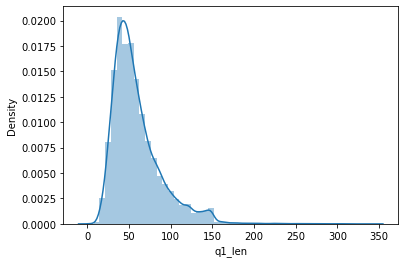

In [147]:
#analysis of features
sns.distplot(new_df['q1_len'])
print('minimum characters:',new_df['q1_len'].min())
print('maximum characters:',new_df['q1_len'].max())
print('average num of characters:',int(new_df['q1_len'].mean()))

minimum characters: 5
maximum characters: 540
average num of characters: 60


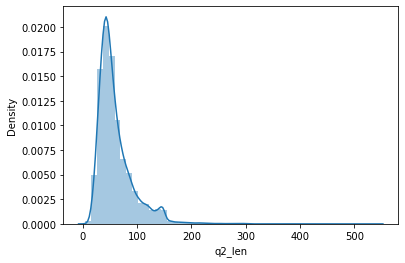

In [148]:
sns.distplot(new_df['q2_len'])
print('minimum characters:',new_df['q2_len'].min())
print('maximum characters:',new_df['q2_len'].max())
print('average num of characters:',int(new_df['q2_len'].mean()))

minimum words: 1
maximum words: 73
average number of words: 10


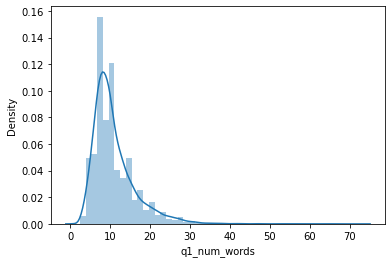

In [149]:
sns.distplot(new_df['q1_num_words'])
print('minimum words:',new_df['q1_num_words'].min())
print('maximum words:',new_df['q1_num_words'].max())
print('average number of words:',int(new_df['q1_num_words'].mean()))

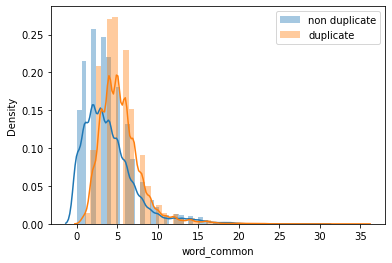

In [150]:
#common words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

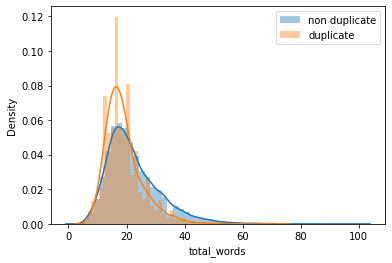

In [151]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['total_words'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['total_words'],label='duplicate')
plt.legend()
plt.show()

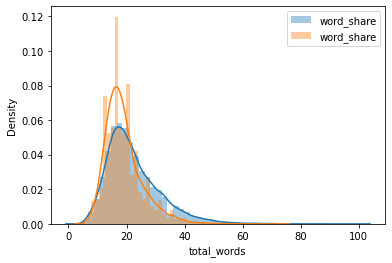

In [152]:
#word_share
sns.distplot(new_df[new_df['is_duplicate']==0]['total_words'],label='word_share')
sns.distplot(new_df[new_df['is_duplicate']==1]['total_words'],label='word_share')
plt.legend()
plt.show()

In [153]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
106255,Why is Google blocked in China?,Why is Facebook blocked in China?
339034,What is species?,What is a species in ecology?
372834,Who is a good ENT in the SF Bay Area?,Are there any good ear-nose-throat doctors ava...
303687,Why did human beings's brain evolve way too sm...,Why did apes evolve into humans? Why couldn't ...
193143,Why is sugar bad for us?,Why sugar is bad for health?


In [154]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [155]:
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share
106255,0,31,33,6,6,5,12,0.42
339034,0,16,29,3,6,2,9,0.22
372834,0,37,124,10,21,5,31,0.16
303687,0,128,107,22,16,7,34,0.21
193143,1,24,28,6,6,5,12,0.42
...,...,...,...,...,...,...,...,...
343359,0,44,57,9,10,0,19,0.00
307968,0,29,42,5,8,0,13,0.00
367855,0,139,88,25,15,4,35,0.11
51878,0,59,88,12,15,4,27,0.15


In [168]:
from sklearn.feature_extraction.text import CountVectorizer

questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [169]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2-pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [173]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_words,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
106255,0,31,33,6,6,5,12,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0
339034,0,16,29,3,6,2,9,0.22,0,0,...,0,0,0,0,0,0,0,0,0,0
372834,0,37,124,10,21,5,31,0.16,0,0,...,0,0,0,0,0,0,0,0,0,0
303687,0,128,107,22,16,7,34,0.21,0,0,...,0,0,0,0,0,0,0,0,0,0
193143,1,24,28,6,6,5,12,0.42,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
final_df.shape

(30000, 6008)

In [176]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [177]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.767

In [178]:
#Prevoisly accuracy was 74%. Now it has incresed to 77%.
#We will now try to increse the accuracy further

# Advanced Features

### 1.Token Features

### 2.Length Based Features

### 3.Fuzzy Features

# Let's try again

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

In [183]:
df=pd.read_csv('train_quora.csv')

In [184]:
new_df=df.sample(30000,random_state=2)

In [185]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


In [198]:
def preprocess(q):
    q=str(q).lower().strip()
    
    #Replace certain string characters with their string equivalents
    q=q.replace('%','precent')
    q=q.replace('%','dollar')
    q=q.replace('@','at')
    
    #The pattern '[math]' appers around 900 times in the whole dataset.
    q=q.replace('[math]','')
    
    #Decontracting words
    contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will","I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
    q_decontracted=[]
    
    for word in q.split():
        if word in contractions:
            word=contractions[word]
            
        q_decontracted.append(word)
    
    q=' '.join(q_decontracted) # Adds all the words in the list to form a sentence
    q=q.replace("'ve","have")
    q=q.replace("n't",'not')
    q=q.replace("'re",'are')
    q=q.replace("'ll",'will')
    
    
    #Removing HTML tags
    q=BeautifulSoup(q)
    q=q.get_text()
    
    #Removing Punctuations
    pattern=re.compile('\W')
    q=re.sub(pattern,' ',q).strip()
    
    return q

In [199]:
preprocess("I've already: wasn't <b>done</b>")

'ihave already  was not done'

In [201]:
new_df['question1']=new_df['question1'].apply(preprocess)
new_df['question2']=new_df['question2'].apply(preprocess)

In [202]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


In [212]:
new_df['q1_len']=new_df['question1'].str.len()
new_df['q2_len']=new_df['question2'].str.len()

In [213]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56


In [215]:
new_df['q1_len']=new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_len']=new_df['question2'].apply(lambda row:len(row.split(" ")))

In [218]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(), row['question1'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [219]:
new_df['word_common']=new_df.apply(common_words,axis=1)

In [224]:
#Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1=row['question1']
    q2=row['question2']
    
    SAFE_DIV=0.0001      #In case denominator becomes 0, SAFE_DIV saves
    
    STOP_WORDS=stopwords.words('english')
    
    token_features=[0.0]*8   #[0.0]*8 means [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
    
    #Converting the sentence into tokens
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    
    #Get the non-stopwords in Questions
    q1_words=set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words=set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stop words in questions
    q1_stops=set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops=set([word for word in q2_tokens if word in STOP_WORDS])
    
    #Get the common non-stop words from question pair
    common_word_count=len(q1_words.intersection(q2_words))
    
    #Get the common stop words from question pair
    common_stop_count=len(q1_stops.intersection(q2_stops))
    
    #Get the common tokens from the question pair
    common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))
    
    token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
    token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV) #In case the denominator bocomes 0, SAFE_DIV saves
    token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops))+SAFE_DIV)
    token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
    
    #Last word of both question is same or not?
    token_features[6]=int(q1_tokens[-1]==q1_tokens[-1])
    
    #First word of both question is same or not?
    token_features[7]=int(q1_tokens[0]==q1_tokens[0])
    
    return token_features

In [246]:
token_features=new_df.apply(fetch_token_features, axis=1)

new_df['cwc_min']=list(map(lambda x:x[0],token_features))
new_df['cwc_max']=list(map(lambda x:x[1],token_features))
new_df['csc_min']=list(map(lambda x:x[2],token_features))
new_df['csc_max']=list(map(lambda x:x[3],token_features))
new_df['ctc_min']=list(map(lambda x:x[4],token_features))
new_df['ctc_max']=list(map(lambda x:x[5],token_features))
new_df['last_word_eq']=list(map(lambda x:x[6],token_features))
new_df['first_word_eq']=list(map(lambda x:x[7],token_features))

In [248]:
new_df.head(3)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,cwc_min,...,csc_max,ctc_min,last_word_eq,first_word_eq,abs_len_diff,mean_length,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,ctc_max
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,12,0.874989,...,0.999980,0.923070,1.0,1.0,0.0,13.0,99,99,99,0.923070
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,13,16,8,0.666644,...,0.624992,0.583328,1.0,1.0,3.0,13.5,69,69,69,0.466664
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,28,21,4,0.000000,...,0.272725,0.149999,1.0,1.0,6.0,23.0,26,26,26,0.115384


In [237]:


def fetch_length_features(row):
    
    q1=row['question1']
    q2=row['question2']
    
    length_features=[0.0]*3
    
    #Converting the sentence into tokens
    q1_tokens=q1.split()
    q2_tokens=q2.split()
    
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return length_features
    
    #Absolute length features
    length_features[0]=abs(len(q1_tokens)-len(q2_tokens))
    
    #Average token length for each questions
    length_features[1]=(len(q1_tokens)+len(q2_tokens))/2
    
    
    
    return length_features

In [238]:
length_features=new_df.apply(fetch_length_features,axis=1)

new_df['abs_len_diff']=list(map(lambda x: x[0],length_features))
new_df['mean_length']=list(map(lambda x: x[1],length_features))

In [249]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,word_common,cwc_min,...,csc_max,ctc_min,last_word_eq,first_word_eq,abs_len_diff,mean_length,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,ctc_max
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,13,13,12,0.874989,...,0.999980,0.923070,1.0,1.0,0.0,13.0,99,99,99,0.923070
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,13,16,8,0.666644,...,0.624992,0.583328,1.0,1.0,3.0,13.5,69,69,69,0.466664
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,28,21,4,0.000000,...,0.272725,0.149999,1.0,1.0,6.0,23.0,26,26,26,0.115384
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,14,32,1,0.000000,...,0.000000,0.000000,1.0,1.0,17.0,21.5,29,29,29,0.000000
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,5,9,3,0.749981,...,0.000000,0.599988,1.0,1.0,4.0,7.0,55,55,55,0.333330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,what are some good web scraping tutorials,what are some good web scraping programs,1,7,7,6,0.749981,...,0.999967,0.857131,1.0,1.0,0.0,7.0,89,89,89,0.857131
91980,91980,154063,154064,can i apply for internet banking in sbi withou...,i have internet banking kit of sbi but it has ...,0,12,18,4,0.599988,...,0.111110,0.333331,1.0,1.0,3.0,13.5,55,55,55,0.266665
266955,266955,133017,384210,how much he laundry detergent do you use in a ...,can i use regular dawn dishsoap in my dishwash...,0,14,19,6,0.499994,...,0.249997,0.428568,1.0,1.0,3.0,15.5,32,32,32,0.352939
71112,71112,122427,122428,what is the best way to understand and learn m...,what are some of the best ways to learn math,1,10,10,5,0.499988,...,0.499992,0.499995,1.0,1.0,0.0,10.0,70,70,70,0.499995


In [240]:
!pip install fuzzywuzzy

In [241]:
#Fuzzy features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1=row['question1']
    q2=row['question2']
    
    fuzzy_features=[0.0]*4
    
    #fuzz ratio
    fuzzy_features[0]=fuzz.QRatio(q1,q2)
    
    #fuzz_partial_ratio
    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)
    
    #token_sort_ratio
    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)
    
    #token_set_ratio
    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)
    
    return fuzzy_features

In [253]:
fuzzy_features=new_df.apply(fetch_fuzzy_features, axis=1)

new_df['fuzz_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['token_sort_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['token_set_ratio']=list(map(lambda x:x[0],fuzzy_features))

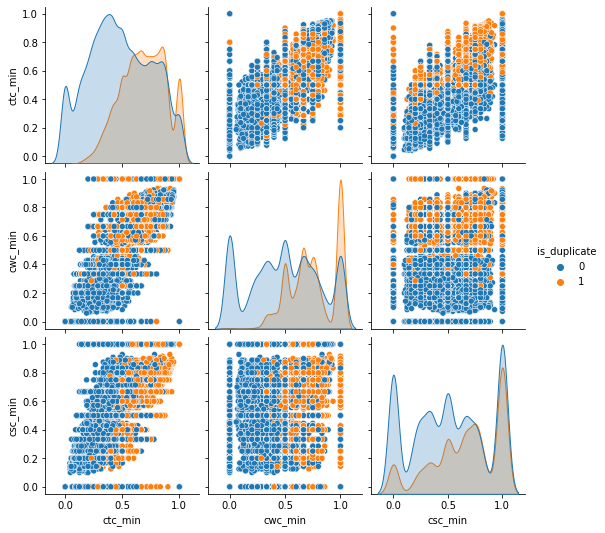

In [244]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

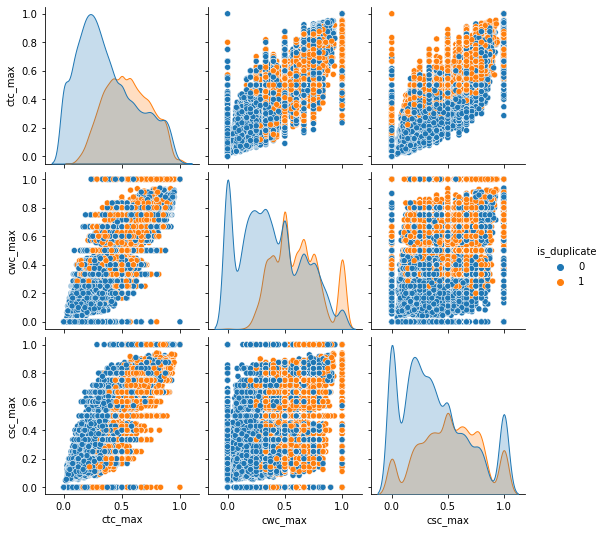

In [250]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')

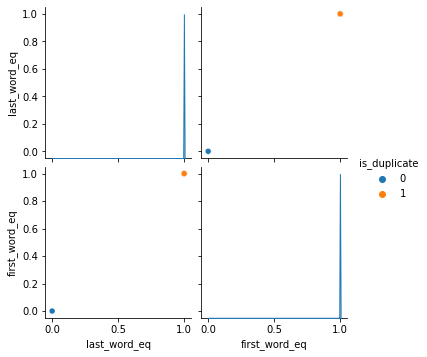

In [251]:
sns.pairplot(new_df[['last_word_eq','first_word_eq','is_duplicate']],hue='is_duplicate')

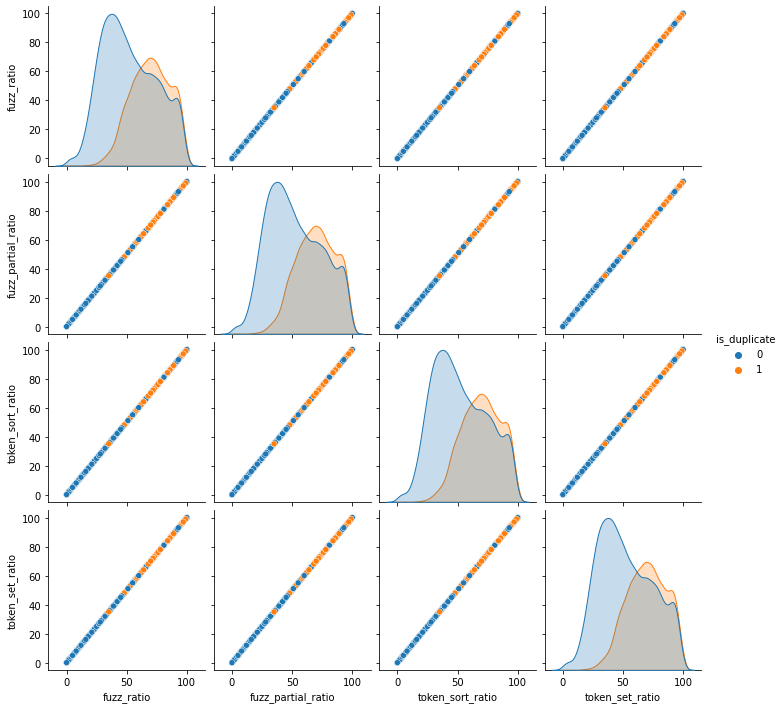

In [254]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [256]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'q1_len', 'q2_len', 'word_common', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'last_word_eq', 'first_word_eq', 'abs_len_diff',
       'mean_length', 'fuzz_ratio', 'fuzz_partial_ratio', 'token_sort_ratio',
       'ctc_max', 'token_set_ratio'],
      dtype='object')

In [257]:
new_df.shape

(30000, 23)

In [258]:
#Using TSNE for Dimensionality Reduction for 15 features(Generated after cleaning the data) to 3 features

from sklearn.preprocessing import MinMaxScaler

x=MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_length','fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio']])
y=new_df['is_duplicate'].values

In [260]:
from sklearn.manifold import TSNE

tsne2d=TSNE(n_components=2,init='random',random_state=101,n_iter=1000,verbose=2,angle=0.5).fit_transform(x) #PCA

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 30000 samples in 0.244s...
[t-SNE] Computed neighbors for 30000 samples in 9.822s...
[t-SNE] Computed conditional probabilities for sample 1000 / 30000
[t-SNE] Computed conditional probabilities for sample 2000 / 30000
[t-SNE] Computed conditional probabilities for sample 3000 / 30000
[t-SNE] Computed conditional probabilities for sample 4000 / 30000
[t-SNE] Computed conditional probabilities for sample 5000 / 30000
[t-SNE] Computed conditional probabilities for sample 6000 / 30000
[t-SNE] Computed conditional probabilities for sample 7000 / 30000
[t-SNE] Computed conditional probabilities for sample 8000 / 30000
[t-SNE] Computed conditional probabilities for sample 9000 / 30000
[t-SNE] Computed conditional probabilities for sample 10000 / 30000
[t-SNE] Computed conditional probabilities for sample 11000 / 30000
[t-SNE] Computed conditional probabilities for sample 12000 / 30000
[t-SNE] Computed conditional probabilities for sam

In [292]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,what is the best marketing automation tool for...,what is the best marketing automation tool for...
115086,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...
327711,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...
367788,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...
151235,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy


In [296]:
final_df=new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 18)


,is_duplicate,q1_len,q2_len,word_common,cwc_min,cwc_max,csc_min,csc_max,ctc_min,last_word_eq,first_word_eq,abs_len_diff,mean_length,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,ctc_max,token_set_ratio
398782,1,13,13,12,0.874989,0.874989,0.999980,0.999980,0.923070,1.0,1.0,0.0,13.0,99,99,99,0.923070,99
115086,0,13,16,8,0.666644,0.499988,0.714276,0.624992,0.583328,1.0,1.0,3.0,13.5,69,69,69,0.466664,69
327711,0,28,21,4,0.000000,0.000000,0.428565,0.272725,0.149999,1.0,1.0,6.0,23.0,26,26,26,0.115384,26
367788,0,14,32,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,17.0,21.5,29,29,29,0.000000,29
151235,0,5,9,3,0.749981,0.599988,0.000000,0.000000,0.599988,1.0,1.0,4.0,7.0,55,55,55,0.333330,55


In [298]:
from sklearn.feature_extraction.text import CountVectorizer
#merge_texts
questions=list(ques_df['question1'])+list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [306]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)

temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [307]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6018)


,is_duplicate,q1_len,q2_len,word_common,cwc_min,cwc_max,csc_min,csc_max,ctc_min,last_word_eq,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,13,13,12,0.874989,0.874989,0.999980,0.999980,0.923070,1.0,...,0,0,0,0,0,0,0,0,0,0
115086,0,13,16,8,0.666644,0.499988,0.714276,0.624992,0.583328,1.0,...,0,0,0,0,0,0,0,0,0,0
327711,0,28,21,4,0.000000,0.000000,0.428565,0.272725,0.149999,1.0,...,0,0,0,0,0,0,0,0,0,0
367788,0,14,32,1,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0,0,0,1,0,0,0,0,0,0
151235,0,5,9,3,0.749981,0.599988,0.000000,0.000000,0.599988,1.0,...,0,0,0,0,0,0,0,0,0,0


In [308]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=42)

In [309]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7748333333333334

In [310]:
!pip install xgboost

     ------------------------------------ 126.1/126.1 MB 266.8 kB/s eta 0:00:00


In [311]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1=xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.778

In [312]:
from sklearn.metrics import confusion_matrix

In [315]:
# for random_forest model
print(confusion_matrix(y_test,y_pred))

[[3222  577]
 [ 774 1427]]


In [314]:
#for xgboost model
confusion_matrix(y_test,y_pred1)

array([[3190,  609],
       [ 723, 1478]], dtype=int64)

# Accuracy score is higher for XGBoost, but why should we use RandomForestClassifier?

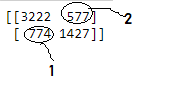

# Taking two input from user and predicting whether two questions are same or not?

The main problem is that the input data to rf.predict() should be in the shape of (1,6017).
So we have to convert the user data is the format with which the model is trained.

In [322]:
def query_point_creator(q1,q2):
    input_query=[]
    
    #preprocess
    q1=preprocess(q1)
    q2=preprocess(q2) #We have defined preprocess() earlier
    
    #fetch basic features
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    #fetch token features
    token_features=test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    #fetch length based features
    length_features=test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    #fetch fuzzy features
    fuzzy_features=test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    #BOW feature for q1
    q1_bow=cv.transform([q1].toarray())
    
    #BOW feature for q2
    q2_bow=cv.transform([q2].toarray())
    
    return np.hstack((np.array(input_query).reshape(1,17),q1_bow,q2_bow))

In [323]:
q1='Where is the capital of India?'
q2='What is the current capital of India?'

In [324]:
query_point_creator(q1,q2)

TypeError: common_words() takes 1 positional argument but 2 were given